### `Task` How dimensionality reduction using Principal Component Analysis (PCA) on the Wine Quality dataset contributes to improving the classification accuracy and efficiency of wine type.

Note : Use KNN for Classification.

Data Link :  [Wine Data](https://docs.google.com/spreadsheets/d/e/2PACX-1vQDVwxneOKOaJL13QMhkAhYrgWlH1tICY7RacUnj_lL8m9uUWaaUf3p7bScNyh_D2Rvt7nc1q11adSy/pub?gid=647503637&single=true&output=csv)

In [95]:
# Data Loading
import pandas as pd
import numpy as np
wine_data_path = "https://docs.google.com/spreadsheets/d/e/2PACX-1vQDVwxneOKOaJL13QMhkAhYrgWlH1tICY7RacUnj_lL8m9uUWaaUf3p7bScNyh_D2Rvt7nc1q11adSy/pub?gid=647503637&single=true&output=csv"
df = pd.read_csv(wine_data_path)
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [96]:
# Your Code goes Here
df.shape

(6497, 13)

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [98]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [99]:
df.isna().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [100]:
df.isnull().sum().sum()

38

In [101]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

In [102]:
df.shape

(5295, 13)

In [ ]:
X = df.drop(columns=['quality'],axis=1)
y = df['quality']

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

X.shape

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

y_pred = knn.predict(X_test)
y_pred_train = knn.predict(X_train)

print('Accuracy Training: ',accuracy_score(y_train,y_pred_train))
print('Accuracy Testing: ',accuracy_score(y_test,y_pred))

In [80]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)

X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [81]:
knn.fit(X_train_trf,y_train)

KNeighborsClassifier()

In [82]:
y_pred = knn.predict(X_test_trf)
y_pred_train = knn.predict(X_train_trf)

print('Accuracy Training: ',accuracy_score(y_train,y_pred_train))
print('Accuracy Testing: ',accuracy_score(y_test,y_pred))

Accuracy Training:  0.6347969782813976
Accuracy Testing:  0.43059490084985835


In [83]:
import plotly.express as px

fig = px.scatter(x=X_test_trf[:,0],
           y=X_test_trf[:,1],
           color=y_test,
           color_discrete_sequence=px.colors.qualitative.G10)
fig.show()

In [84]:
fig = px.scatter_3d(x=X_train_trf[:,0],
              y=X_train_trf[:,1],
              z=X_train_trf[:,2],
              color=y_train,
              color_discrete_sequence=px.colors.qualitative.G10)
fig.show()

In [85]:
for i in range(1,df.shape[1]-1):
    pca = PCA(n_components=i)

    X_train_trf = pca.fit_transform(X_train)
    X_test_trf = pca.transform(X_test)
    
    knn.fit(X_train_trf,y_train)        
    
    y_pred = knn.predict(X_test_trf)

    print(f'Accuracy Testing {i}: ',accuracy_score(y_test,y_pred))
    

Accuracy Testing 1:  0.3814919735599622
Accuracy Testing 2:  0.40415486307837584
Accuracy Testing 3:  0.43059490084985835
Accuracy Testing 4:  0.45703493862134087
Accuracy Testing 5:  0.45609065155807366
Accuracy Testing 6:  0.493862134088763
Accuracy Testing 7:  0.5051935788479698
Accuracy Testing 8:  0.5118035882908404
Accuracy Testing 9:  0.5278564683663833
Accuracy Testing 10:  0.52219074598678
Accuracy Testing 11:  0.5250236071765817


In [86]:
pca.explained_variance_

array([2.96251427, 2.49867241, 1.59089313, 0.93840006, 0.73389284,
       0.62058282, 0.5204628 , 0.50073959, 0.33104802, 0.22674796,
       0.03487853])

In [87]:
pca.components_.shape

(11, 11)

In [88]:
comp = np.cumsum(pca.explained_variance_ratio_)
comp

array([0.2703312 , 0.49833654, 0.64350649, 0.72913606, 0.79610422,
       0.85273277, 0.90022531, 0.9459181 , 0.97612643, 0.99681731,
       1.        ])

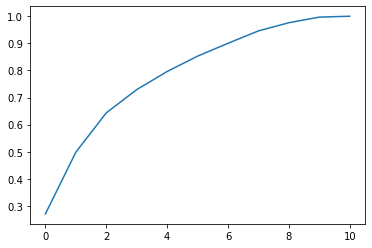

In [89]:
import matplotlib.pyplot as plt
plt.plot(comp)

# With Type Column as Label

In [104]:
# Data Loading
import pandas as pd
wine_data_path = "https://docs.google.com/spreadsheets/d/e/2PACX-1vQDVwxneOKOaJL13QMhkAhYrgWlH1tICY7RacUnj_lL8m9uUWaaUf3p7bScNyh_D2Rvt7nc1q11adSy/pub?gid=647503637&single=true&output=csv"
wine = pd.read_csv(wine_data_path)
wine.head(1)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6


In [105]:
# We need to remove duplicated rows and missing value rows
import pandas as pd

# Load the Wine Quality dataset
wine_data = pd.read_csv(wine_data_path)
print("Wine Data Shape :", wine_data.shape)
# Drop rows with missing values
wine_data = wine_data.dropna()

# Dropping Duplicates rows
wine_data.drop_duplicates(inplace=True)
print("Wine Data Shape (After Dropping-) :", wine_data.shape)

Wine Data Shape : (6497, 13)
Wine Data Shape (After Dropping-) : (5295, 13)


In [106]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


# Separate features (physicochemical properties) and target variable (type)
X = wine_data.drop('type', axis=1)
y = wine_data['type']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a K-Nearest Neighbors (KNN) classifier without PCA
knn_no_pca = KNeighborsClassifier(n_neighbors=5)
knn_no_pca.fit(X_train_scaled, y_train)

# Predict the wine type on the testing set without PCA
y_pred_no_pca = knn_no_pca.predict(X_test_scaled)

# Evaluate the classification accuracy without PCA
accuracy_no_pca = accuracy_score(y_test, y_pred_no_pca)
print("KNN having features -", X_train_scaled.shape[1])
print("Classification Accuracy without PCA: {:.2f}%".format(accuracy_no_pca * 100))


KNN having features - 12
Classification Accuracy without PCA: 99.34%


In [107]:
# Apply PCA on the standardized features
pca = PCA(n_components=5)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Train a K-Nearest Neighbors (KNN) classifier with PCA
knn_with_pca = KNeighborsClassifier(n_neighbors=5)
knn_with_pca.fit(X_train_pca, y_train)

# Predict the wine type on the testing set with PCA
y_pred_pca = knn_with_pca.predict(X_test_pca)

# Evaluate the classification accuracy with PCA
accuracy_pca = accuracy_score(y_test, y_pred_pca)

print("KNN having features -", X_train_pca.shape[1])
print("Classification Accuracy with PCA: {:.2f}%".format(accuracy_pca * 100))

KNN having features - 5
Classification Accuracy with PCA: 98.87%
